# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# create empty lists
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []
record_counter = 0
set_counter = 1

print("Beginning Data Retrieval")
print("-----------------------------")

# set base url
base_url=f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

# extract information for the cities
for city in cities:
    url = base_url + city
    response = requests.get(url).json()
    try:
        city_list.append(response["name"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response["main"]["temp_max"])
        humidity_list.append(response["main"]["humidity"])
        cloudiness_list.append(response["clouds"]["all"])
        wind_speed_list.append(response["wind"]["speed"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        if record_counter == 50:
            record_counter = 1
            set_counter +=1
        else:
            record_counter +=1   
        print(f"Processing Record {record_counter} of Set {set_counter}: {city}")
    except KeyError:
        print("City not found. Skipping...")    
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1: montes altos
Processing Record 2 of Set 1: bathsheba
Processing Record 3 of Set 1: rikitea
Processing Record 4 of Set 1: moerai
Processing Record 5 of Set 1: torbay
Processing Record 6 of Set 1: champerico
Processing Record 7 of Set 1: nuevo casas grandes
Processing Record 8 of Set 1: velikodvorskiy
Processing Record 9 of Set 1: vao
Processing Record 10 of Set 1: albany
Processing Record 11 of Set 1: talakan
City not found. Skipping...
Processing Record 12 of Set 1: nikolskoye
City not found. Skipping...
Processing Record 13 of Set 1: hermanus
Processing Record 14 of Set 1: troyes
City not found. Skipping...
Processing Record 15 of Set 1: marawi
Processing Record 16 of Set 1: bluff
Processing Record 17 of Set 1: bosaso
City not found. Skipping...
Processing Record 18 of Set 1: vardo
Processing Record 19 of Set 1: barrow
Processing Record 20 of Set 1: bandarbeyla
Processing Record 21 of Set 1: katsuura


Processing Record 43 of Set 4: hambantota
Processing Record 44 of Set 4: prince rupert
Processing Record 45 of Set 4: muskogee
City not found. Skipping...
Processing Record 46 of Set 4: rudnichnyy
Processing Record 47 of Set 4: nouadhibou
Processing Record 48 of Set 4: ambilobe
Processing Record 49 of Set 4: mezen
Processing Record 50 of Set 4: dromolaxia
Processing Record 1 of Set 5: victoria
Processing Record 2 of Set 5: coachella
Processing Record 3 of Set 5: walvis bay
Processing Record 4 of Set 5: visby
Processing Record 5 of Set 5: beringovskiy
Processing Record 6 of Set 5: yeppoon
Processing Record 7 of Set 5: churapcha
Processing Record 8 of Set 5: vila praia de ancora
Processing Record 9 of Set 5: araguacu
Processing Record 10 of Set 5: verkh-usugli
City not found. Skipping...
Processing Record 11 of Set 5: miri
Processing Record 12 of Set 5: svetlogorsk
Processing Record 13 of Set 5: san patricio
Processing Record 14 of Set 5: hervey bay
Processing Record 15 of Set 5: dasoguz

City not found. Skipping...
Processing Record 37 of Set 8: pietersburg
Processing Record 38 of Set 8: kazerun
Processing Record 39 of Set 8: pacifica
Processing Record 40 of Set 8: dudinka
Processing Record 41 of Set 8: muravlenko
City not found. Skipping...
Processing Record 42 of Set 8: arua
Processing Record 43 of Set 8: maldonado
Processing Record 44 of Set 8: halifax
Processing Record 45 of Set 8: uruzgan
Processing Record 46 of Set 8: bengkulu
Processing Record 47 of Set 8: ratodero
Processing Record 48 of Set 8: sompeta
Processing Record 49 of Set 8: vestmannaeyjar
Processing Record 50 of Set 8: ossora
City not found. Skipping...
Processing Record 1 of Set 9: mayumba
Processing Record 2 of Set 9: koumac
City not found. Skipping...
Processing Record 3 of Set 9: byron bay
Processing Record 4 of Set 9: eyl
Processing Record 5 of Set 9: oakland
Processing Record 6 of Set 9: villazon
Processing Record 7 of Set 9: camajuani
Processing Record 8 of Set 9: arlit
Processing Record 9 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create new df
cities_df = pd.DataFrame({
    "City": city_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": max_temp_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": wind_speed_list,
    "Country": country_list,
    "Date": date_list})

# export new data into a .csv file
cities_df.to_csv("../output_data/cities.csv", index=None, header=True)

# display the new dataframe
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Montes Altos,-5.8333,-47.0667,73.13,92,5,4.81,BR,1612226899
1,Bathsheba,13.2167,-59.5167,78.80,61,20,20.71,BB,1612226899
2,Rikitea,-23.1203,-134.9692,78.80,75,91,14.07,PF,1612226899
3,Moerai,-22.4333,-151.3333,80.33,65,20,7.76,PF,1612226899
4,Torbay,47.6666,-52.7314,28.99,80,90,13.80,CA,1612226900


## Inspect data and remove cities where the humidity > 100%.

In [5]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,21.025761,18.995391,47.487766,75.962162,56.317117,8.439892,1.612227e+09
std,33.847868,89.626515,32.715421,18.088940,41.313938,6.157940,8.487705e+01
min,-54.800000,-179.166700,-51.210000,2.000000,0.000000,0.130000,1.612227e+09
25%,-8.284850,-59.873400,27.000000,69.000000,5.500000,3.815000,1.612227e+09
50%,27.716700,22.455400,59.810000,80.000000,75.000000,7.230000,1.612227e+09
75%,50.117650,96.066650,74.200000,89.000000,100.000000,11.500000,1.612227e+09
max,78.218600,179.316700,95.000000,100.000000,100.000000,58.160000,1.612227e+09


In [211]:
#  Get the indices of cities that have humidity over 100%.
# for index, row in cities_df.itterows():
#     humid_city = row(["Humidity"] > 99)
    
    
#     print(f"{humid_city} at index {index} has humidity over 100%")
    

In [212]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

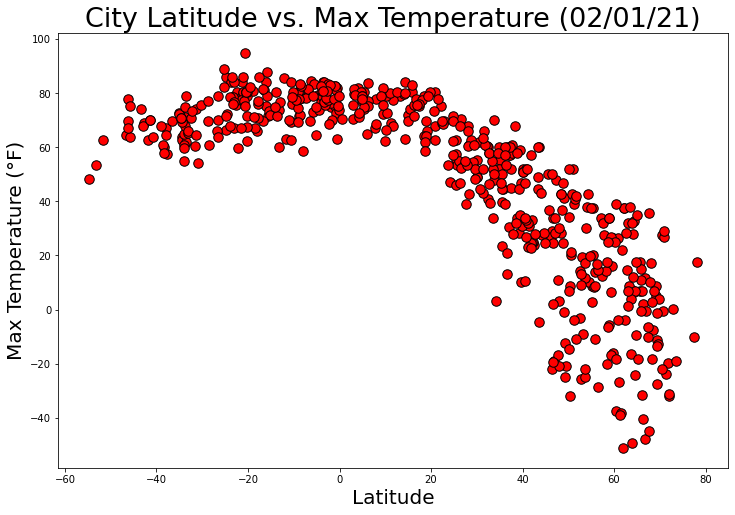

In [8]:
# create a scatter plot to show relationship between lattitude and max temperature
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="o", s=90, c="r", edgecolor="k")

# add labels for readability
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"City Latitude vs. Max Temperature ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Max Temperature (°F)", fontsize=20)

# save figure as a .png file
plt.savefig("../output_data/Fig1.png")

plt.show()

## Latitude vs. Humidity Plot

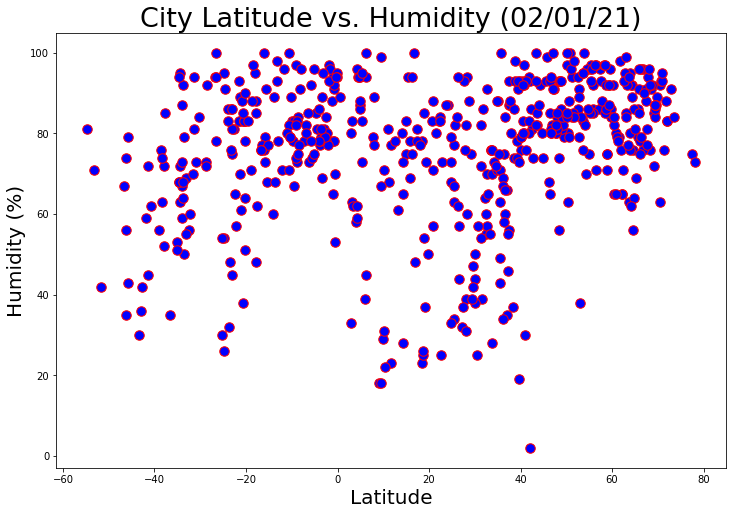

In [9]:
# create a scatter plot to show relationship between lattitude and humidity
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o", s=90, c="b", edgecolor="r")

# add labels for readability
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"City Latitude vs. Humidity ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Humidity (%)", fontsize=20)

# save figure as a .png file
plt.savefig("../output_data/Fig2.png")

plt.show()

## Latitude vs. Cloudiness Plot

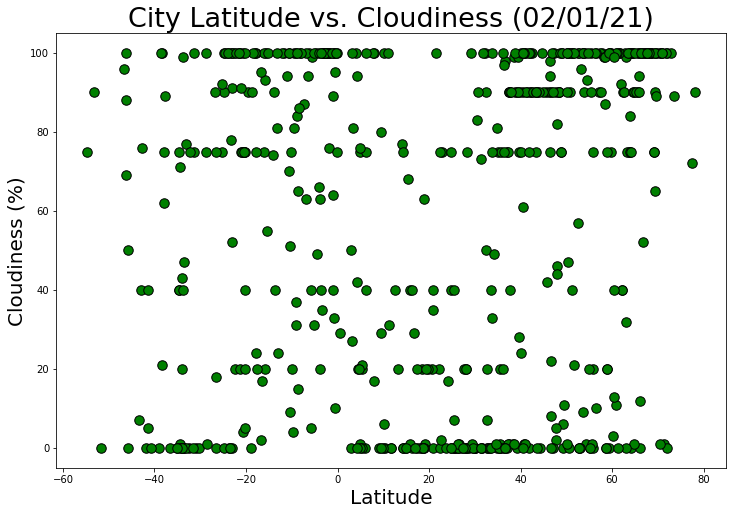

In [10]:
# create a scatter plot to show relationship between lattitude and cloudiness
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
fig1, ax1 = plt.subplots(figsize=(12, 8))

# add labels for readability
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o", s=90, c="g", edgecolor="k")
plt.title(f"City Latitude vs. Cloudiness ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Cloudiness (%)", fontsize=20)

# save figure as a .png file
plt.savefig("../output_data/Fig3.png")

plt.show()

## Latitude vs. Wind Speed Plot

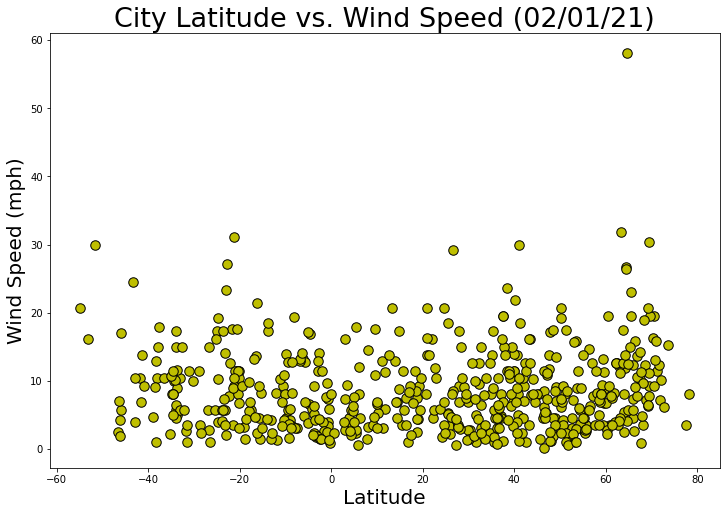

In [11]:
# create a scatter plot to show relationship between lattitude and wind speed
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
fig1, ax1 = plt.subplots(figsize=(12, 8))

# add labels for readability
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o", s=90, c="y", edgecolor="k")
plt.title(f"City Latitude vs. Wind Speed ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Wind Speed (mph)", fontsize=20)

# save figure as a .png file
plt.savefig("../output_data/Fig4.png")

plt.show()

## Linear Regression

In [12]:
# seperate data by northern and southern hemispheres
n_hem = cities_df.loc[cities_df["Lat"] > 0]
s_hem = cities_df.loc[cities_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8293584936823004


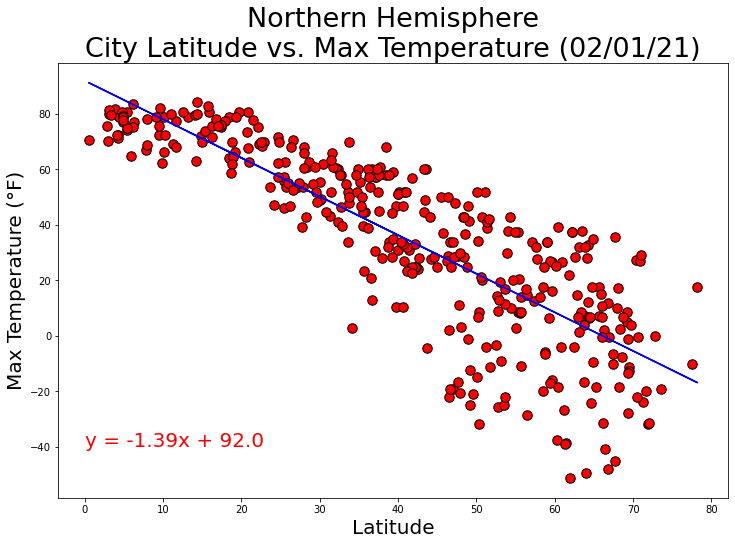

In [13]:
# create a scatter plot to show relationship between lattitude and max temp in the northern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = n_hem["Lat"]
y_value = n_hem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="r", edgecolor="k")

# plot regression line
plt.plot(x_value, regress_values, "b-")

# print equation in graph
plt.annotate(line_eq, (0,-40), fontsize=20, color="r")

# add labels for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Northern Hemisphere\nCity Latitude vs. Max Temperature ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Max Temperature (°F)", fontsize=20)

print(f"The r-value is: round{rvalue}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5118665113834269


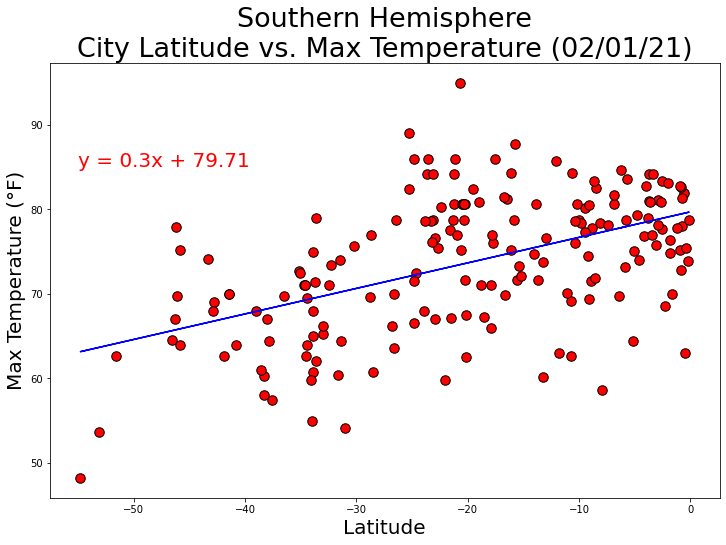

In [15]:
# create a scatter plot to show relationship between lattitude and max temp in the southern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = s_hem["Lat"]
y_value = s_hem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="r", edgecolor="k")

# plot regression line
plt.plot(x_value, regress_values, "b-")

# print equation in graph
plt.annotate(line_eq, (-55,85), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Southern Hemisphere\nCity Latitude vs. Max Temperature ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Max Temperature (°F)", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3649824491528927


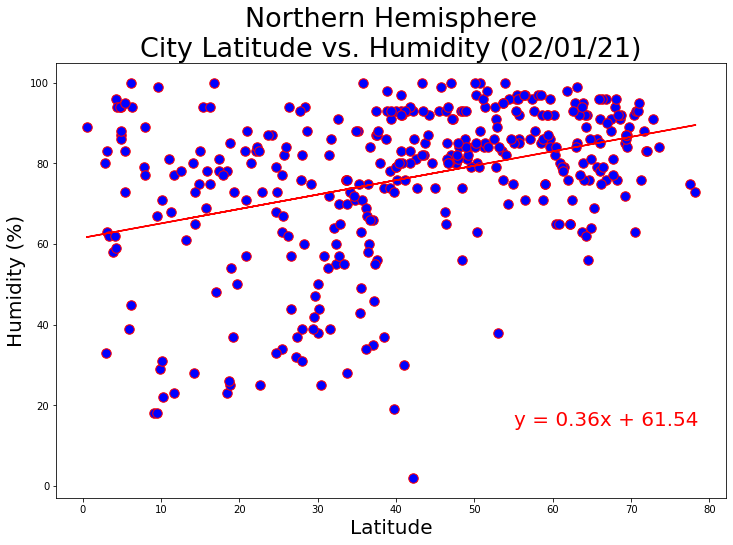

In [16]:
# create a scatter plot to show relationship between lattitude and humidity in the northern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = n_hem["Lat"]
y_value = n_hem["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="b", edgecolor="r")

# plot regression line
plt.plot(x_value, regress_values, "r-")

# print equation in graph
plt.annotate(line_eq, (55,15), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Northern Hemisphere\nCity Latitude vs. Humidity ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Humidity (%)", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.4573395561875906


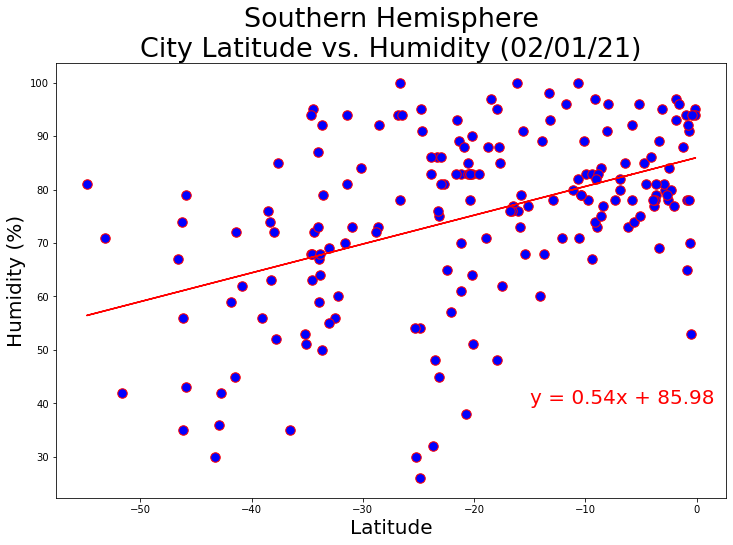

In [18]:
# create a scatter plot to show relationship between lattitude and humidity in the southern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = s_hem["Lat"]
y_value = s_hem["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="b", edgecolor="r")

# plot regression line
plt.plot(x_value, regress_values, "r-")

# print equation in graph
plt.annotate(line_eq, (-15,40), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Southern Hemisphere\nCity Latitude vs. Humidity ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Humidity (%)", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.40539684573125345


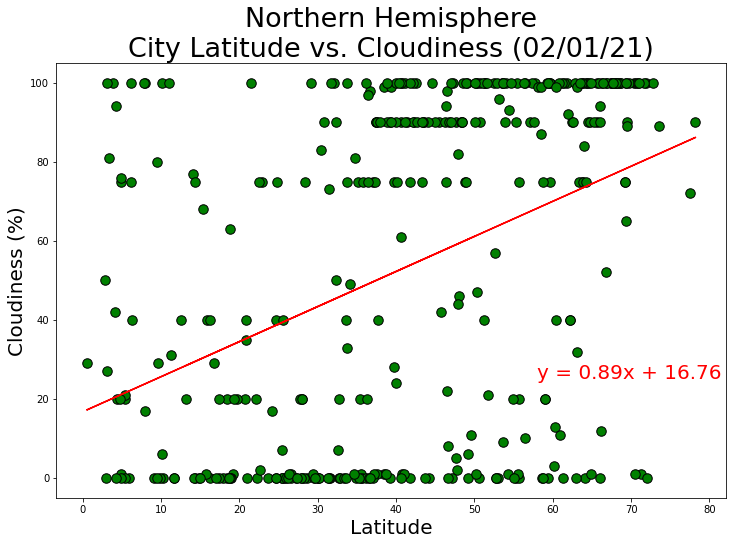

In [21]:
# create a scatter plot to show relationship between lattitude and cloudiness in the northern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = n_hem["Lat"]
y_value = n_hem["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="g", edgecolor="k")

# plot regression line
plt.plot(x_value, regress_values, "r-")

# print equation in graph
plt.annotate(line_eq, (58,25), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Northern Hemisphere\nCity Latitude vs. Cloudiness ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Cloudiness (%)", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3316745164480331


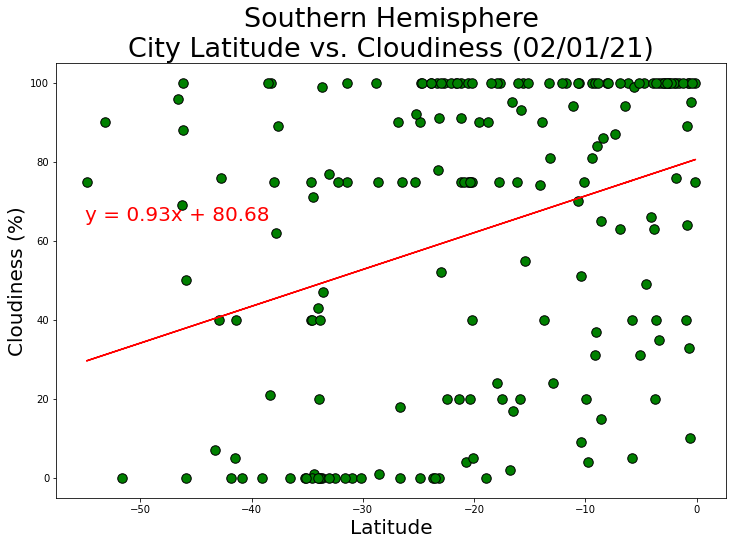

In [22]:
# create a scatter plot to show relationship between lattitude and cloudiness in the southern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = s_hem["Lat"]
y_value = s_hem["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="g", edgecolor="k")

# plot regression line
plt.plot(x_value, regress_values, "r-")

# print equation in graph
plt.annotate(line_eq, (-55,65), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Southern Hemisphere\nCity Latitude vs. Cloudiness ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Cloudiness (%)", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1686540312680839


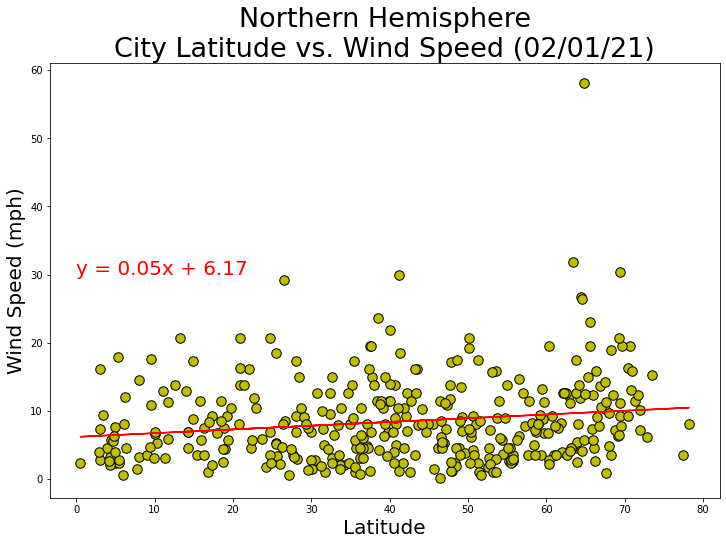

In [23]:
# create a scatter plot to show relationship between lattitude and wind speed in the northern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = n_hem["Lat"]
y_value = n_hem["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="y", edgecolor="k")

# plot regression line
plt.plot(x_value, regress_values, "r-")

# print equation in graph
plt.annotate(line_eq, (0,30), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Northern Hemisphere\nCity Latitude vs. Wind Speed ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Wind Speed (mph)", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2482676903367145


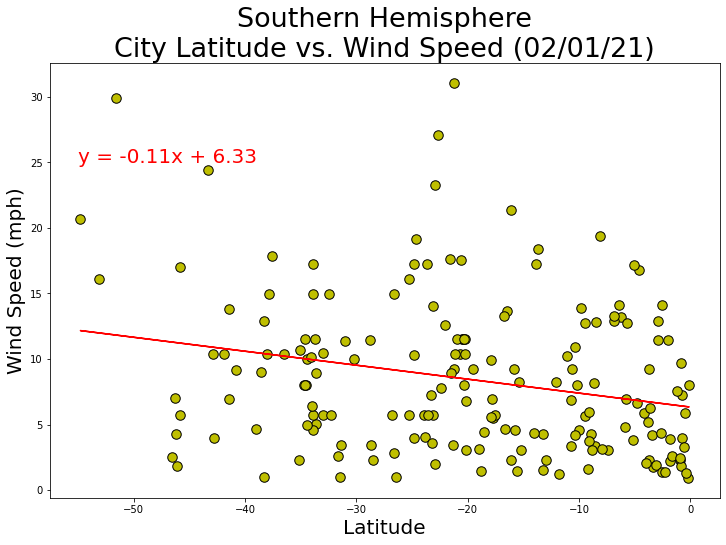

In [24]:
# create a scatter plot to show relationship between lattitude and wind speed in the southern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = s_hem["Lat"]
y_value = s_hem["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="y", edgecolor="k")

# plot regression line
plt.plot(x_value, regress_values, "r-")

# print equation in graph
plt.annotate(line_eq, (-55,25), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Southern Hemisphere\nCity Latitude vs. Wind Speed ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Wind Speed (mph)", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.show()